In [1]:
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [2]:
#hide
from fastbook import *

# Your Deep Learning Journey

## Deep Learning Is for Everyone

## Neural Networks: A Brief History

## Who We Are

## How to Learn Deep Learning

### Your Projects and Your Mindset

## The Software: PyTorch, fastai, and Jupyter

## Your First Model

### Getting a GPU Deep Learning Server

### Running Your First Notebook

In [ ]:
# CLICK ME
# Model for recognizing cats vs dogs
from fastai.vision.all import *
path = untar_data(URLs.PETS)/'images'

def is_cat(x): return x[0].isupper()
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))

learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /home/ubuntu/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

/home/ubuntu/miniconda3/lib/python3.9/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /tmp/pip-req-build-1wfnpb1e/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


epoch,train_loss,valid_loss,error_rate,time


### Sidebar: This Book Was Written in Jupyter Notebooks

In [ ]:
1+1

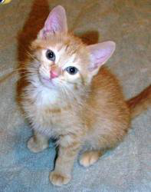

In [3]:
img = PILImage.create(image_cat())
img.to_thumb(192)

### End sidebar

In [ ]:
uploader = widgets.FileUpload()
uploader

In [ ]:
#hide
# For the book, we can't actually click an upload button, so we fake it
uploader = SimpleNamespace(data = ['images/chapter1_cat_example.jpg'])

In [ ]:
img = PILImage.create(uploader.data[0])
is_cat,_,probs = learn.predict(img)
print(f"Is this a cat?: {is_cat}.")
print(f"Probability it's a cat: {probs[1].item():.6f}")

### What Is Machine Learning?

In [ ]:
gv('''program[shape=box3d width=1 height=0.7]
inputs->program->results''')

In [ ]:
gv('''model[shape=box3d width=1 height=0.7]
inputs->model->results; weights->model''')

In [ ]:
gv('''ordering=in
model[shape=box3d width=1 height=0.7]
inputs->model->results; weights->model; results->performance
performance->weights[constraint=false label=update]''')

In [ ]:
gv('''model[shape=box3d width=1 height=0.7]
inputs->model->results''')

### What Is a Neural Network?

### A Bit of Deep Learning Jargon

In [ ]:
gv('''ordering=in
model[shape=box3d width=1 height=0.7 label=architecture]
inputs->model->predictions; parameters->model; labels->loss; predictions->loss
loss->parameters[constraint=false label=update]''')

### Limitations Inherent To Machine Learning

From this picture we can now see some fundamental things about training a deep learning model:

- A model cannot be created without data.
- A model can only learn to operate on the patterns seen in the input data used to train it.
- This learning approach only creates *predictions*, not recommended *actions*.
- It's not enough to just have examples of input data; we need *labels* for that data too (e.g., pictures of dogs and cats aren't enough to train a model; we need a label for each one, saying which ones are dogs, and which are cats).

Generally speaking, we've seen that most organizations that say they don't have enough data, actually mean they don't have enough *labeled* data. If any organization is interested in doing something in practice with a model, then presumably they have some inputs they plan to run their model against. And presumably they've been doing that some other way for a while (e.g., manually, or with some heuristic program), so they have data from those processes! For instance, a radiology practice will almost certainly have an archive of medical scans (since they need to be able to check how their patients are progressing over time), but those scans may not have structured labels containing a list of diagnoses or interventions (since radiologists generally create free-text natural language reports, not structured data). We'll be discussing labeling approaches a lot in this book, because it's such an important issue in practice.

Since these kinds of machine learning models can only make *predictions* (i.e., attempt to replicate labels), this can result in a significant gap between organizational goals and model capabilities. For instance, in this book you'll learn how to create a *recommendation system* that can predict what products a user might purchase. This is often used in e-commerce, such as to customize products shown on a home page by showing the highest-ranked items. But such a model is generally created by looking at a user and their buying history (*inputs*) and what they went on to buy or look at (*labels*), which means that the model is likely to tell you about products the user already has or already knows about, rather than new products that they are most likely to be interested in hearing about. That's very different to what, say, an expert at your local bookseller might do, where they ask questions to figure out your taste, and then tell you about authors or series that you've never heard of before.

### How Our Image Recognizer Works

### What Our Image Recognizer Learned

### Image Recognizers Can Tackle Non-Image Tasks

### Jargon Recap

## Deep Learning Is Not Just for Image Classification

In [4]:
# Segmentation model using photos from Car dashcam
# Segmentation: a model that can recognize the content of every individual pixel in an image
path = untar_data(URLs.CAMVID_TINY)
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = get_image_files(path/"images"),
    label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(path/'codes.txt', dtype=str)
)

learn = unet_learner(dls, resnet34)
learn.fine_tune(8)

/home/ubuntu/miniconda3/lib/python3.9/site-packages/torch/_tensor.py:575: UserWarning: floor_divide is deprecated, and will be removed in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values.
To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor'). (Triggered internally at  /tmp/pip-req-build-1wfnpb1e/aten/src/ATen/native/BinaryOps.cpp:467.)
  return torch.floor_divide(self, other)
/home/ubuntu/miniconda3/lib/python3.9/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /tmp/pip-req-build-1wfnpb1e/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation

epoch,train_loss,valid_loss,time
0,2.724549,2.435395,00:30


epoch,train_loss,valid_loss,time
0,1.886162,1.742031,00:32
1,1.613728,1.462536,00:32
2,1.453351,1.269442,00:31
3,1.324039,1.149342,00:32
4,1.192740,0.931473,00:32
5,1.077148,0.870927,00:32
6,0.980244,0.864384,00:31
7,0.904582,0.842495,00:32


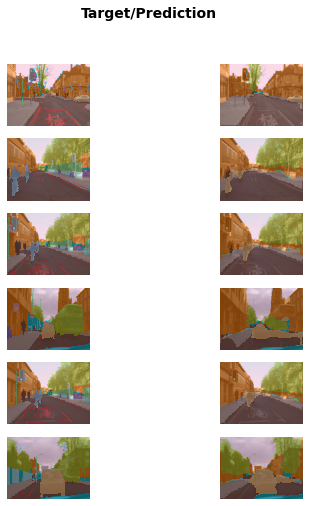

In [7]:
learn.show_results(max_n=6, figsize=(7,8))

In [ ]:
# Model that classifies the sentiment of a movie review
from fastai.text.all import *

dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test')
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)
learn.fine_tune(4, 1e-2)

If you hit a "CUDA out of memory error" after running this cell, click on the menu Kernel, then restart. Instead of executing the cell above, copy and paste the following code in it:

```
from fastai.text.all import *

dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test', bs=32)
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)
learn.fine_tune(4, 1e-2)
```

This reduces the batch size to 32 (we will explain this later). If you keep hitting the same error, change 32 to 16.

In [ ]:
learn.predict("I really liked that movie!")

### Sidebar: The Order Matters

### End sidebar

In [ ]:
# Model that predicts whether a person is a high income earner, based on socioeconomic background
from fastai.tabular.all import *
path = untar_data(URLs.ADULT_SAMPLE)

dls = TabularDataLoaders.from_csv(path/'adult.csv', path=path, y_names="salary",
    cat_names = ['workclass', 'education', 'marital-status', 'occupation',
                 'relationship', 'race'],
    cont_names = ['age', 'fnlwgt', 'education-num'],
    procs = [Categorify, FillMissing, Normalize])

learn = tabular_learner(dls, metrics=accuracy)

In [ ]:
learn.fit_one_cycle(3)

In [ ]:
# Model that predicts movies people might like, based on their previous viewing habits
from fastai.collab import *
path = untar_data(URLs.ML_SAMPLE)
dls = CollabDataLoaders.from_csv(path/'ratings.csv')
learn = collab_learner(dls, y_range=(0.5,5.5))
learn.fine_tune(10)

In [ ]:
learn.show_results()

### Sidebar: Datasets: Food for Models

### End sidebar

## Validation Sets and Test Sets

### Use Judgment in Defining Test Sets

## A _Choose Your Own Adventure_ moment

## Questionnaire

It can be hard to know in pages and pages of prose what the key things are that you really need to focus on and remember. So, we've prepared a list of questions and suggested steps to complete at the end of each chapter. All the answers are in the text of the chapter, so if you're not sure about anything here, reread that part of the text and make sure you understand it. Answers to all these questions are also available on the [book's website](https://book.fast.ai). You can also visit [the forums](https://forums.fast.ai) if you get stuck to get help from other folks studying this material.

For more questions, including detailed answers and links to the video timeline, have a look at Radek Osmulski's [aiquizzes](http://aiquizzes.com/howto).

1. Do you need these for deep learning?
>   - Lots of math T / *F*
>   - Lots of data T / *F*
>   - Lots of expensive computers T / *F*
>   - A PhD T / *F*      
1. Name five areas where deep learning is now the best in the world.
> NLP, Computer Vision, Medicine, Biology, Image Generation     
1. What was the name of the first device that was based on the principle of the artificial neuron?
> Mark I Perceptron by Frank Rosenblatt
1. Based on the book of the same name, what are the requirements for parallel distributed processing (PDP)?
> ***PDP***: a model of memory that's based on the idea that the brain performs a range of functions all at once rather than in a series of activies
> - contains a set of processing units
> - a state of activation for each unit
> - an output function for each unit
> - a pattern of connectivity among units
> - a propogation rule to spread patterns of activities through the network of connected units
> - an activation rule to combine inputs and current state of the unit to produce an output
> - a learning rule for modifying connection based on experience
> - an environment that provides the sytem with experience

1. What were the two theoretical misunderstandings that held back the field of neural networks?
> Early enthusiast gave up on neural networks after the 1969 book, *Perceptrons*, stated that a single layer of the device was unable to learn simple, yet critcal mathematical functions. Although this *is* possible with the addition of more layers, it went unrecognized until the 80's when the idea of adding more layers was being explored. Although more layers did improve performance, networks quickly became too large and costly, as well as slow until technology was able to support such a system 
1. What is a GPU?
> ***Graphical Processing Unit (GPU)***: usually referred to as a "graphics card" or a "GPU", is a component of a computer which executes thousands and thousands of tasks/operations (artihmetic operations). In practice, a network of GPU's interconnected are used to train neural networks   
1. Open a notebook and execute a cell containing: `1+1`. What happens?
> Python adds the sum and outputs the result: `2`
1. Follow through each cell of the stripped version of the notebook for this chapter. Before executing each cell, guess what will happen.
> ✔
1. Complete the Jupyter Notebook online appendix.
> ✔
1. Why is it hard to use a traditional computer program to recognize images in a photo?
> Refer to the idea of PDP. It is difficult, maybe imposible for humans to code in detail what explicity happens in their brain when they recognize something.
1. What did Samuel mean by "weight assignment"?
> Samuel refers to the models *performance* when speaking about "weight assignment's." In practice, adjusting the `Weights` define how a will model behave/operate
1. What term do we normally use in deep learning for what Samuel called "weights"?
> The term `Parameters` are used when referring to the "weights" of a model
1. Draw a picture that summarizes Samuel's view of a machine learning model.
```python
gv('''ordering=in
model[shape=box3d width=1 height=0.7]
inputs->model->results; weights->model; results->performance
performance->weights[constraint=false label=update]''')
```
1. Why is it hard to understand why a deep learning model makes a particular prediction?
> With a neural network being made up of many neuron layers all interconnected makes it difficult to understand why given predictions are made. This is why as programmers we are interested in the 'weights' input to the model, which gives us a slight understanding of how the models behaves
1. What is the name of the theorem that shows that a neural network can solve any mathematical problem to any level of accuracy?
> The theorem that shows a neural network can solve any mathematical problem is called the `Universal Approximation Theorem`
1. What do you need in order to train a model?
> - *Labeled* Data
> - An architechture
> - A loss function
> - A means to update the `parameters` of the model
```python
learn = cnn_learner(data, models.resnet18, metrics=accuracy) 
```
1. How could a feedback loop impact the rollout of a predictive policing model?
> A feedback loop may introduce biases (positive feedback loops) if the data the model is being trained on lacks variance.
1. Do we always have to use 224×224-pixel images with the cat recognition model?
> No, although 224x224-pixel images are the standard simply for historical reason
1. What is the difference between classification and regression?
> ***Classification***: a model that attempts to predict a *discrete* possibility, class or category "think of 'labels' for data).
>
> ***Regression***: a model that attempts to predict one or more *numeric quantities* (i.e. temperature, location coordinates)
1. What is a validation set? What is a test set? Why do we need them?
> The *Validation* and *Test sets* are sets of data reserved to be used to fit and validate the model after training, respectively. We need both sets to measure the accuracy of the model. 
1. What will fastai do if you don't provide a validation set?
> fastai will automatically reserve 20% of the dataset to be used as the *Validation set* (`valid_pct=0.2 by default`)
1. Can we always use a random sample for a validation set? Why or why not?
> It depends on the application of the model. If the *Validation set* is not representative of data the model would see in practice, a random sample is *not* recommended.
1. What is overfitting? Provide an example.
> Training a model in such a way that it *remembers* specific features of the input data, rather than generalizing well to data not seen during training Occurs when either not enough data was used in training or if the model was overtrained with data(i.e. a handwritten digit recognizer only being fed data of one persons handwriting). The accuracy of the model will degrade.
1. What is a metric? How does it differ from "loss"?
> ***Metric***: a function that of measures how well a model performs using the validation set. Intended for human interpretation to give more intiutive understanding of model performance.
>
> ***Loss***: an optimaztion algorithm used to measure performance. Differs from *metric* by being inteded for the `Stochastic Gradient Descent (SGD)` to update model parameters accordingly. 
1. How can pretrained models help?
> Pretrained models validate that your model is capable (it is an already trained model, right?). It allows for more accurate and faster testing, all with less data, time and money
1. What is the "head" of a model?
> The last part of the model
1. What kinds of features do the early layers of a CNN find? How about the later layers?
> ***Convolutional Neural Network***: a type of neural network that works particularly well for vision tasks
>
> - *Layer 1*: detects edges (vertical, horizonal, diagonal) and color gradients
> - *Layer 2*: can distinguish shapes, patterns
> - *Layer 3*: recognize objects
> - *Layer 4*: facial recognition
1. Are image models only useful for photos?
> Not at all, they are also useful in medical data, sketches, or data represented as images (spectograms, time series data)
1. What is an "architecture"?
> The `architecture` is usually used to refer to the pretrained models used to fit or train a model.
1. What is segmentation?
> `Segmentation` is a pixelwise classifaction problem used in computer vision which seperates an image into individual pixels. With the image being seperated at the pixel level, a model is trained to differentiate pixels to understand what is in a given image
1. What is `y_range` used for? When do we need it?
> The `y_range` parameter is used in a datablock in fastai to return data within a given range, specifically when a predicton is needed for a continuous number (*Regression* model), rather than a category or label (*Classification* model). Otherwise, the `x_range` parameter would be used.
1. What are "hyperparameters"?
> "Parameters" on the parameters, for example, how long to train the model or the learning rate of the model.
>
> ***Learning Rate***: how fast and often model parameters are allowed to change)
1. What's the best way to avoid failures when using AI in an organization?
> - Reserve enough data to define 'Validation', 'Training', and 'Testing' sets
> - Set a baseline that future iteration of the model aim to beat

### Further Research

Each chapter also has a "Further Research" section that poses questions that aren't fully answered in the text, or gives more advanced assignments. Answers to these questions aren't on the book's website; you'll need to do your own research!

1. Why is a GPU useful for deep learning? How is a CPU different, and why is it less effective for deep learning?
1. Try to think of three areas where feedback loops might impact the use of machine learning. See if you can find documented examples of that happening in practice.

# Computer Vision Practice

### Understanding Model API's and Procedure

There are 3 levels of API a user can decide to use when implementing fast.ai

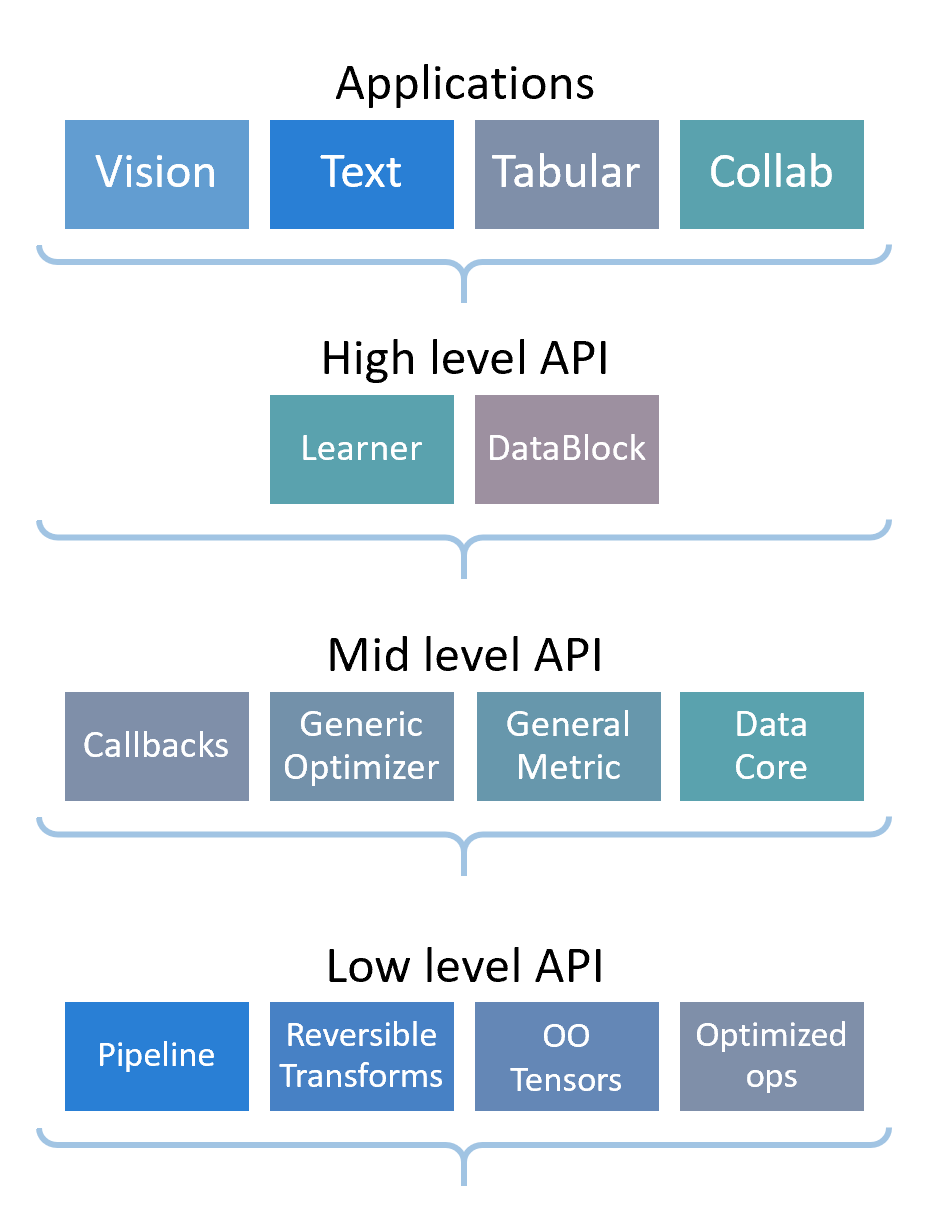
1. Factory method
1. Data block API
1. Mid-level API
Below mostly the Data block API methodology is used.

Imports all of the fastai.vision library. The syntax import * in fastai is designed to only important the necessary packages into your environment.
```python
from fastai.data.all import *
from fastai.vision.all import *
```

untar_data() downloads and decompresses the data to a subdirectory of fastai. Returns a `Path` object to the data location
```python
path = untar_data(url)
```

Using [Get functions](https://docs.fast.ai/data.transforms.html#Get,-split,-and-label) are a good test to validate the data was successfully extracted
```python
fnames = get_files(path)
```

Depending on the model, the class used for loading datasets will vary (i.e. for an image based model, ImageDataLoaders() would be used. For text, TextDataLoaders() would be appropriate). 
This line of code tells fastai what kind of dataset is being used and batches the data accordingly. 
```python
dls = DataLoaderClass(path, fnames,...,)
```

Groups together some dls, sometimes a pre-trained model and a loss function to handle training the model.
```python
learn = learner(dls, model, loss_func)
```

* `dls` is a `DataLoaders` object, that you can create from standard PyTorch dataloaders. By doing so, you will lose all showing functionality like `show_batch`/`show_results`.
* `model` is a standard PyTorch model. You can use anyone you like, just make sure it accepts the number of inputs you have in your `DataLoaders` and returns as many outputs as you have targets.
* `loss_func` can be any loss function you like. It needs to be one of fastai's if you want to use `Learn.predict` or `Learn.get_preds`, or you will have to implement special methods (see more details after the `BaseLoss` documentation).
